# Fuzzy Logic Project 1 - Final

## Özge Bülbül 2220765008

In [68]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score, classification_report,roc_auc_score
from sklearn.preprocessing import MinMaxScaler
import skfuzzy as fuzz

In [2]:
# Here I took random csvs but used random seed 42 to get the same randomized dataset each time.

random.seed(42)

no_sepsis_path = "sepsis_dataset-2/dataset/no_sepsis"
sepsis_path = "sepsis_dataset-2/dataset/sepsis"
num_files_to_pick = 750

def select_random_files(folder_path, num_files):
    files = os.listdir(folder_path)
    selected_files = random.sample(files, num_files)
    return [os.path.join(folder_path, file) for file in selected_files]

In [3]:
selected_no_sepsis = select_random_files(no_sepsis_path, num_files_to_pick)
selected_sepsis = select_random_files(sepsis_path, num_files_to_pick)

selected_files = selected_no_sepsis + selected_sepsis

print(f"Selected {len(selected_no_sepsis)} 'no_sepsis' files and {len(selected_sepsis)} 'sepsis' files.")

Selected 750 'no_sepsis' files and 750 'sepsis' files.


In [4]:
selected_no_sepsis

['sepsis_dataset-2/dataset/no_sepsis\\688.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\200.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\120.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\782.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\351.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\323.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\303.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\226.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\778.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\192.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\721.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\781.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\920.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\600.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\179.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\642.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\488.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\127.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\125.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\184.csv',
 'sepsis_dataset-2/dataset/no_sepsis\\3.

In [5]:
# This function below takes all csvs and merges their mean values so from 1500 csvs it returns a 1500 row, merged dataset.
def load_and_merge_csv_with_mean(file_list):
    data_frames = []
    for file in file_list:
        df = pd.read_csv(file)
        mean_df = df.mean().to_frame().T
        data_frames.append(mean_df)
    return pd.concat(data_frames, ignore_index=True)

In [6]:
merged_data = load_and_merge_csv_with_mean(selected_files)
print(f"Merged data shape: {merged_data.shape}")

Merged data shape: (1500, 27)


In [7]:
merged_data.head()

,heart_rate,bp_systolic,bp_diastolic,map,resp,temp,spo2,fio2,wbc,bun,...,bicarbonate,hemoglobin,hematocrit,potassium,chloride,gcs,age,sirs,qsofa,sepsis_icd
0,91.416667,104.458333,60.791667,71.250000,19.500000,36.326389,98.000000,NaN,12.209524,12.619048,...,29.238095,11.176190,31.880952,3.947619,88.000000,15.000000,62.84,0.500000,0.000000,0.0
1,84.954545,130.818182,66.954545,85.772727,14.409091,36.809179,98.318182,50.0,5.066667,20.444444,...,25.222222,10.395238,27.565217,4.360870,104.428571,14.727273,65.75,0.086957,0.086957,0.0
2,100.571429,114.809524,52.714286,72.619048,18.000000,37.405000,99.238095,NaN,15.700000,14.000000,...,24.000000,9.028571,28.130000,4.004167,110.000000,12.142857,52.58,0.500000,0.000000,0.0
3,100.545455,111.000000,64.500000,75.681818,20.045455,36.934343,94.142857,NaN,6.400000,14.000000,...,30.000000,13.300000,41.600000,4.300000,102.000000,14.818182,81.23,0.181818,0.136364,0.0
4,94.652174,117.521739,62.086957,74.260870,17.130435,36.277778,93.391304,NaN,6.600000,26.000000,...,23.000000,9.900000,30.600000,4.600000,109.000000,14.000000,79.85,0.217391,0.086957,0.0


In [8]:
merged_data['sepsis_icd'] = merged_data['sepsis_icd'].round().astype(int)   # I am turning sepsis_icd back into 0-1 values because it turned to float like 0.0 after taking mean

print(merged_data['sepsis_icd'].unique())

[0 1]


In [9]:
# I shuffled the dataset
merged_data = merged_data.sample(frac=1).reset_index(drop=True)

In [10]:
merged_data

,heart_rate,bp_systolic,bp_diastolic,map,resp,temp,spo2,fio2,wbc,bun,...,bicarbonate,hemoglobin,hematocrit,potassium,chloride,gcs,age,sirs,qsofa,sepsis_icd
0,95.043478,100.217391,49.521739,61.782609,17.521739,36.444444,94.478261,NaN,9.900000,44.190476,...,21.809524,11.200000,32.080952,4.833333,100.000000,14.695652,85.85,0.130435,0.130435,0
1,71.695652,121.652174,69.173913,81.739130,17.000000,35.787879,95.782609,NaN,8.100000,14.217391,...,25.217391,13.200000,38.800000,4.552174,88.608696,15.000000,67.13,0.000000,0.000000,0
2,100.000000,104.380952,55.619048,66.952381,27.761905,37.224868,98.190476,NaN,8.300000,17.000000,...,17.000000,8.300000,26.400000,3.900000,110.000000,15.000000,76.85,0.714286,0.380952,1
3,79.652174,105.782609,42.956522,59.000000,29.695652,37.185990,94.217391,73.913043,25.400000,94.000000,...,19.000000,6.900000,21.300000,4.200000,100.000000,13.217391,87.41,0.791667,0.625000,0
4,94.166667,113.208333,64.750000,76.083333,14.875000,36.656084,95.875000,NaN,14.300000,27.608696,...,27.000000,8.952174,25.300000,3.752174,108.000000,10.000000,50.52,0.666667,0.166667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,62.625000,125.416667,59.041667,79.625000,15.875000,36.968255,97.208333,NaN,8.500000,15.000000,...,29.000000,14.200000,42.200000,4.100000,102.000000,15.000000,77.93,0.000000,0.000000,0
1496,87.875000,113.625000,54.791667,74.402759,21.416667,36.656566,98.500000,NaN,14.700000,39.375000,...,32.250000,10.325000,29.475000,3.537500,93.375000,15.000000,72.81,0.875000,0.000000,0
1497,81.409091,132.523810,42.238095,64.761905,23.095238,35.790404,98.904762,NaN,10.700000,22.000000,...,34.000000,12.200000,35.394737,3.700000,101.000000,15.000000,82.55,0.500000,0.000000,0
1498,112.347826,126.454545,66.454545,81.363636,27.869565,36.381643,97.347826,45.652174,15.392857,43.173913,...,27.173913,11.238095,32.500000,3.617391,104.652174,14.590909,91.40,1.000000,0.304348,1


Below, I did some visualization to detect correlations etc.

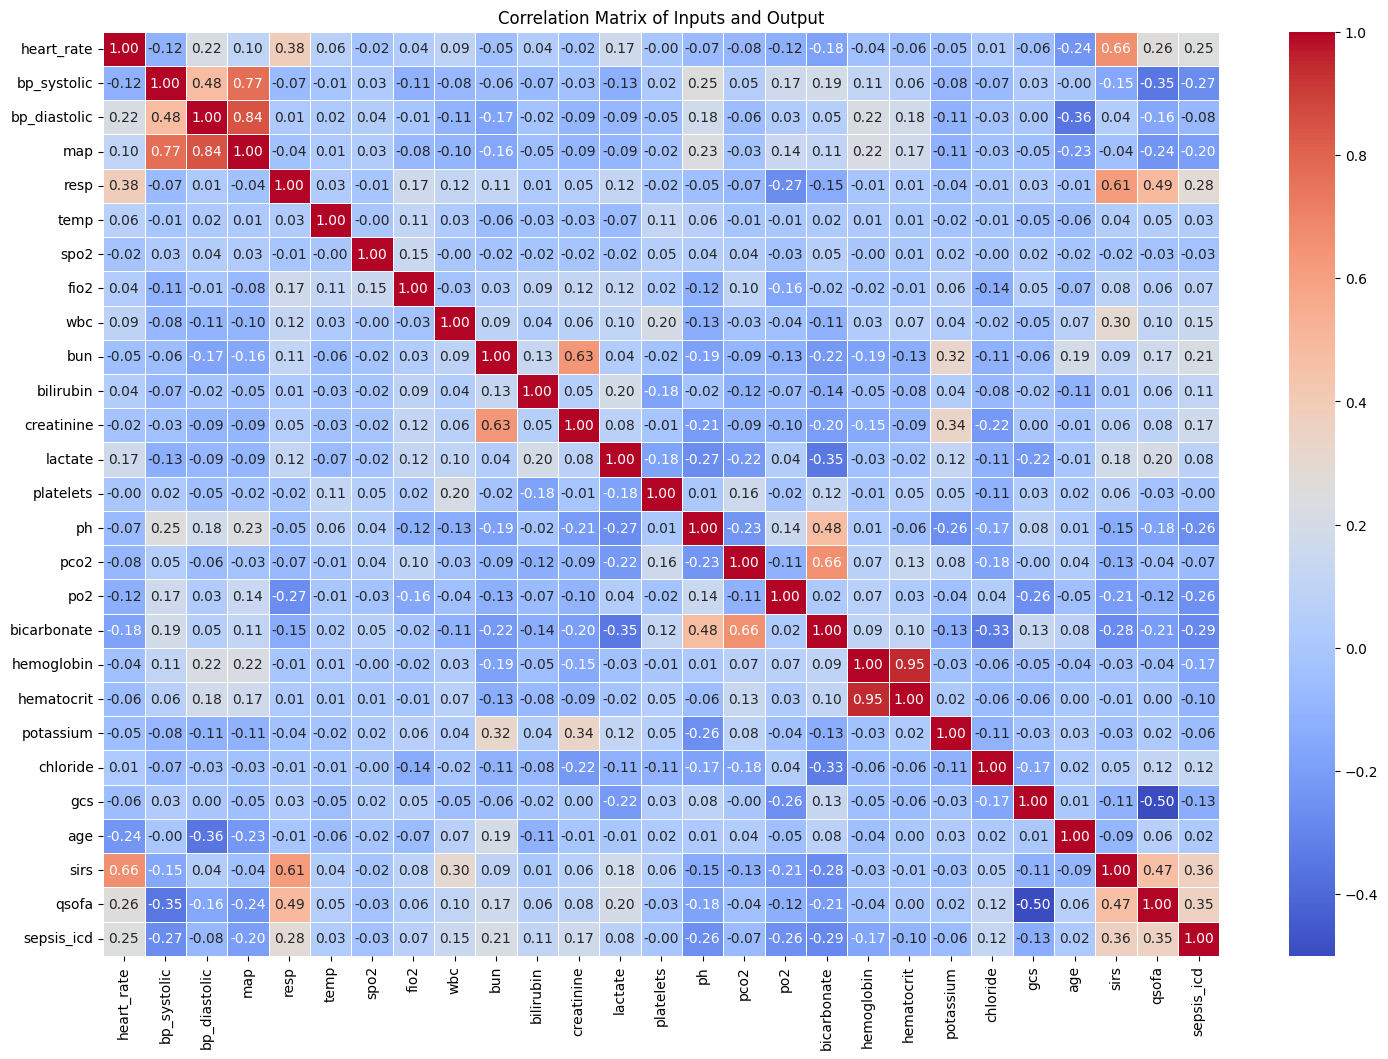

In [11]:
correlation_matrix = merged_data.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Inputs and Output")
plt.show()

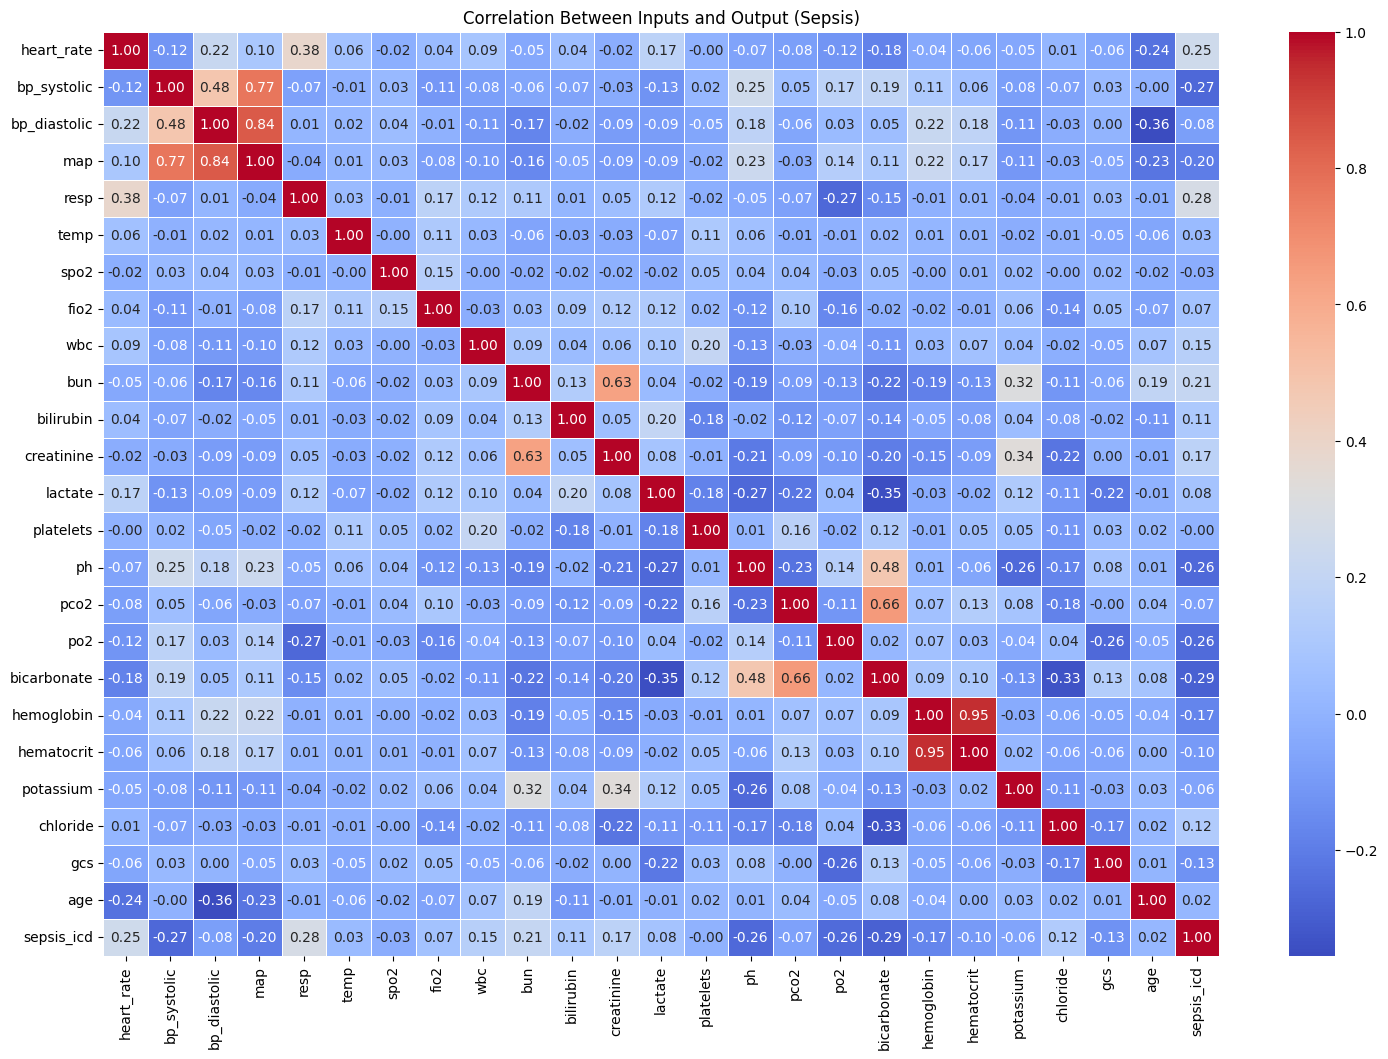

In [12]:
input_columns = ["heart_rate", "bp_systolic", "bp_diastolic", "map", "resp", "temp", "spo2", "fio2", "wbc", "bun", "bilirubin", "creatinine", "lactate", "platelets", "ph", "pco2", "po2", "bicarbonate", "hemoglobin", "hematocrit", "potassium", "chloride", "gcs", "age"]
output_column = 'sepsis_icd'

input_output_corr = merged_data[input_columns + [output_column]].corr()

plt.figure(figsize=(18, 12))
sns.heatmap(input_output_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Inputs and Output (Sepsis)")
plt.show()

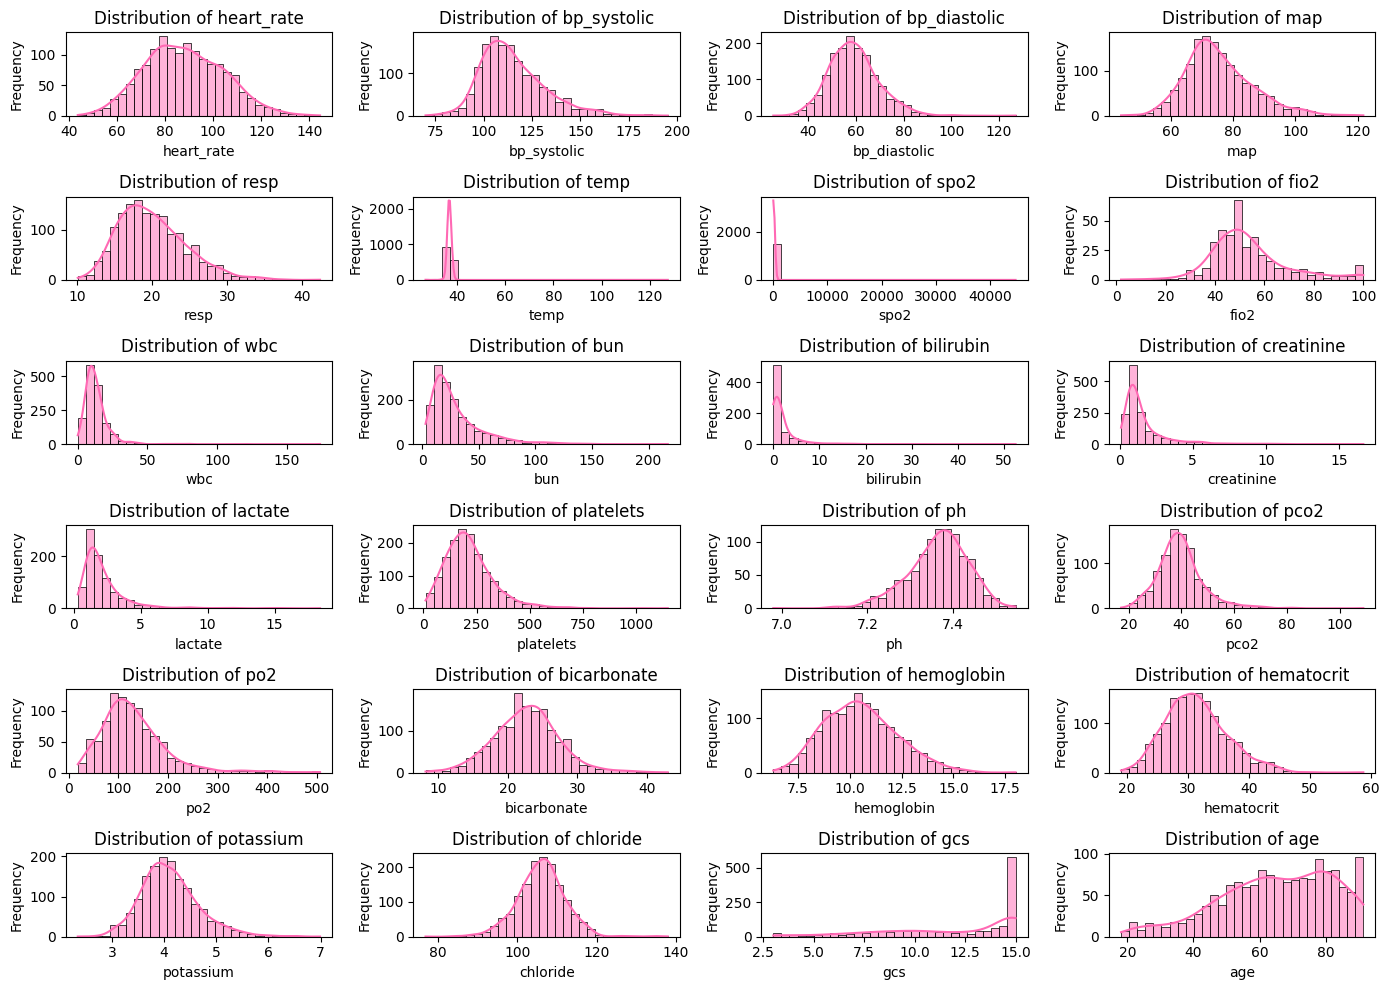

In [13]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(input_columns, 1):
    plt.subplot(6, 4, i)
    sns.histplot(merged_data[column], kde=True, color='hotpink', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

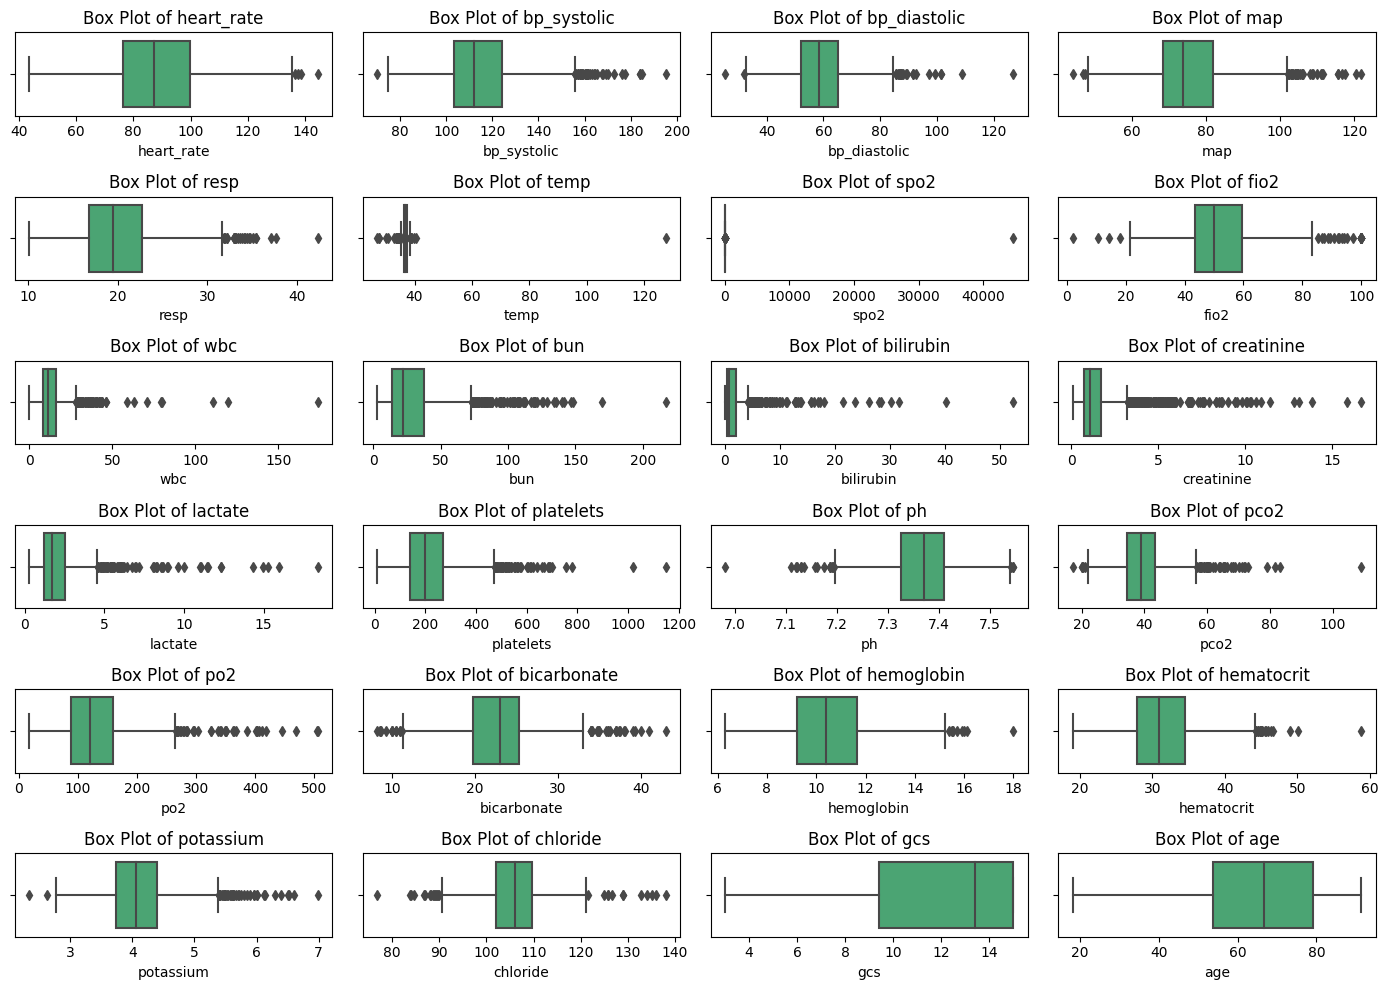

In [14]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(input_columns, 1):
    plt.subplot(6,4, i)
    sns.boxplot(x=merged_data[column], color='mediumseagreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [15]:
stats = merged_data[input_columns].agg(['min', 'max', 'std']).transpose()
stats.columns = ['Min', 'Max', 'Standard Deviation']

print("Statistical Summary of Parameters:")
print(stats)

# Count the number of positive (sepsis=1) and negative (sepsis=0) instances
positive_instances = merged_data[merged_data['sepsis_icd'] == 1].shape[0]
negative_instances = merged_data[merged_data['sepsis_icd'] == 0].shape[0]

print("\nNumber of Positive and Negative Instances:")
print(f"Positive Instances (Sepsis=1): {positive_instances}")
print(f"Negative Instances (Sepsis=0): {negative_instances}")

Statistical Summary of Parameters:
                    Min           Max  Standard Deviation
heart_rate    43.739130    144.454545           16.258880
bp_systolic   70.000000    195.208333           16.549550
bp_diastolic  25.315789    127.000000           10.502009
map           44.100000    121.863636           10.835700
resp          10.130435     42.333333            4.495964
temp          27.024154    127.416667            2.484233
spo2          62.565217  44675.000000         1151.768767
fio2           2.000000    100.000000           16.085031
wbc            0.100000    173.754545            9.659916
bun            3.000000    217.000000           23.651828
bilirubin      0.000000     52.476923            4.351757
creatinine     0.100000     16.647826            1.687106
lactate        0.300000     18.400000            1.867463
platelets     10.086957   1148.285714          116.346330
ph             6.980000      7.546364            0.070958
pco2          17.157895    109.000000

Below, I did missing value handling.

In [16]:
missing_values = merged_data.isnull().sum()
print(missing_values[missing_values > 0])

map               1
spo2              2
fio2           1119
bilirubin       801
lactate         592
platelets         1
ph              496
pco2            543
po2             542
bicarbonate       2
hemoglobin        5
chloride          1
dtype: int64


In [17]:
low_missing_cols = merged_data.columns[(merged_data.isnull().mean() < 0.2) & (merged_data.isnull().mean() > 0)]
low_missing_cols

Index(['map', 'spo2', 'platelets', 'bicarbonate', 'hemoglobin', 'chloride'], dtype='object')

In [18]:
for col in low_missing_cols:
    merged_data[col].fillna(merged_data[col].median(), inplace=True)

# Drop high missingness columns (>50%)
high_missing_cols = merged_data.columns[merged_data.isnull().mean() > 0.4]
print(high_missing_cols)
merged_data.drop(columns=high_missing_cols, inplace=True)

# Verify remaining nulls and columns
print("Remaining null values:")
print(merged_data.isnull().sum())
print("\nRemaining columns:")
print(merged_data.columns)

Index(['fio2', 'bilirubin'], dtype='object')
Remaining null values:
heart_rate        0
bp_systolic       0
bp_diastolic      0
map               0
resp              0
temp              0
spo2              0
wbc               0
bun               0
creatinine        0
lactate         592
platelets         0
ph              496
pco2            543
po2             542
bicarbonate       0
hemoglobin        0
hematocrit        0
potassium         0
chloride          0
gcs               0
age               0
sirs              0
qsofa             0
sepsis_icd        0
dtype: int64

Remaining columns:
Index(['heart_rate', 'bp_systolic', 'bp_diastolic', 'map', 'resp', 'temp',
       'spo2', 'wbc', 'bun', 'creatinine', 'lactate', 'platelets', 'ph',
       'pco2', 'po2', 'bicarbonate', 'hemoglobin', 'hematocrit', 'potassium',
       'chloride', 'gcs', 'age', 'sirs', 'qsofa', 'sepsis_icd'],
      dtype='object')


In [19]:
moderate_missing_cols = ['lactate', 'ph', 'pco2', 'po2']
for col in moderate_missing_cols:
    merged_data[col].fillna(merged_data[col].median(), inplace=True)

# Verify final dataset
print("Remaining null values:")
print(merged_data.isnull().sum())
print("\nFinal columns:")
print(merged_data.columns)

Remaining null values:
heart_rate      0
bp_systolic     0
bp_diastolic    0
map             0
resp            0
temp            0
spo2            0
wbc             0
bun             0
creatinine      0
lactate         0
platelets       0
ph              0
pco2            0
po2             0
bicarbonate     0
hemoglobin      0
hematocrit      0
potassium       0
chloride        0
gcs             0
age             0
sirs            0
qsofa           0
sepsis_icd      0
dtype: int64

Final columns:
Index(['heart_rate', 'bp_systolic', 'bp_diastolic', 'map', 'resp', 'temp',
       'spo2', 'wbc', 'bun', 'creatinine', 'lactate', 'platelets', 'ph',
       'pco2', 'po2', 'bicarbonate', 'hemoglobin', 'hematocrit', 'potassium',
       'chloride', 'gcs', 'age', 'sirs', 'qsofa', 'sepsis_icd'],
      dtype='object')


In [77]:
merged_data.to_csv('merged_data.csv', index=False)

In [20]:
correlation_matrix = merged_data.corr()

correlation_with_target = correlation_matrix['sepsis_icd'].sort_values(ascending=False)
print(correlation_with_target)

sepsis_icd      1.000000
sirs            0.361527
qsofa           0.350267
resp            0.282415
heart_rate      0.248462
bun             0.211074
creatinine      0.173191
wbc             0.147805
chloride        0.121773
lactate         0.118772
temp            0.034410
age             0.017086
platelets      -0.003784
spo2           -0.026033
pco2           -0.049435
potassium      -0.063099
bp_diastolic   -0.081114
hematocrit     -0.097893
gcs            -0.130823
hemoglobin     -0.170438
po2            -0.193735
map            -0.198833
ph             -0.220355
bp_systolic    -0.265758
bicarbonate    -0.288430
Name: sepsis_icd, dtype: float64


In [21]:
threshold = 0.22   # I picked this threshold to continue on my analysis with only the most relevant features

selected_features = correlation_with_target[abs(correlation_with_target) > threshold].index.tolist()

print("\nSelected features based on correlation with target:")
print(selected_features)


Selected features based on correlation with target:
['sepsis_icd', 'sirs', 'qsofa', 'resp', 'heart_rate', 'ph', 'bp_systolic', 'bicarbonate']


In [22]:
# New dataset with only the selected features
selected_data = merged_data[selected_features]

# Shape of the selected dataset
print("\nShape of the dataset with selected features:")
print(selected_data.shape)


Shape of the dataset with selected features:
(1500, 8)


In [23]:
correlation_matrix_filtered = selected_data.corr()
correlation_with_target = correlation_matrix_filtered['sepsis_icd'].sort_values(ascending=False)
print(correlation_with_target)

sepsis_icd     1.000000
sirs           0.361527
qsofa          0.350267
resp           0.282415
heart_rate     0.248462
ph            -0.220355
bp_systolic   -0.265758
bicarbonate   -0.288430
Name: sepsis_icd, dtype: float64


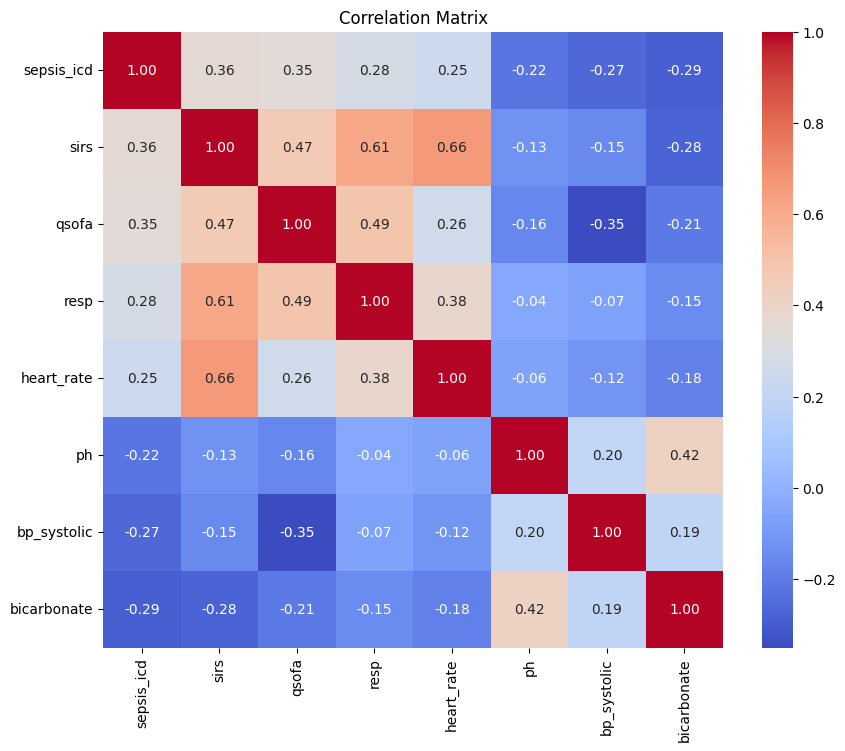

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

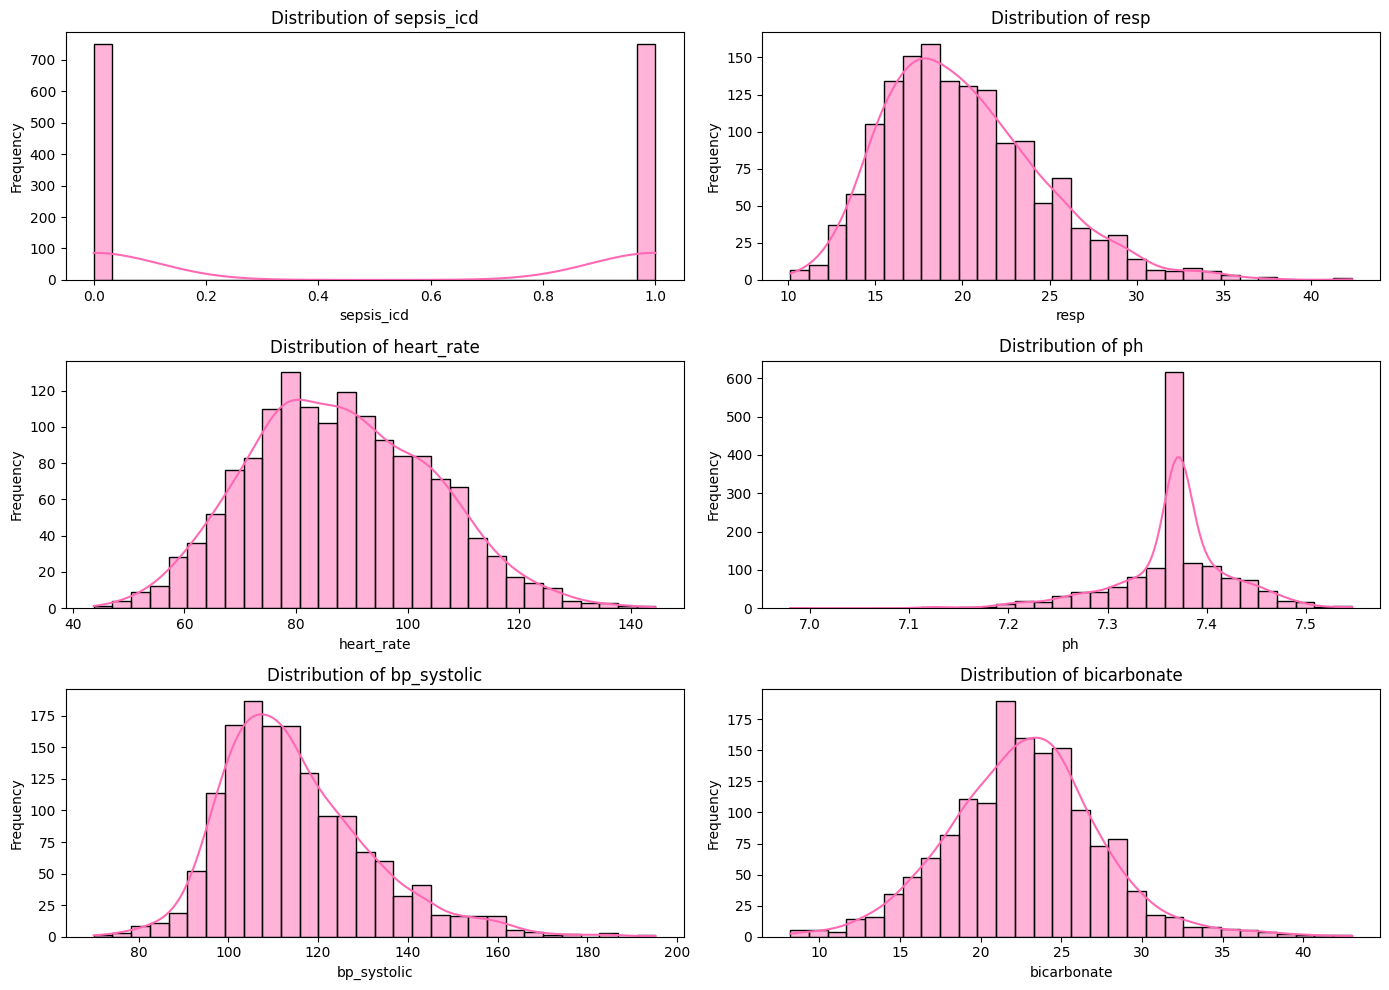

In [74]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(selected_data, 1):
    plt.subplot(3, 2, i)
    sns.histplot(selected_data[column], kde=True, color='hotpink', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

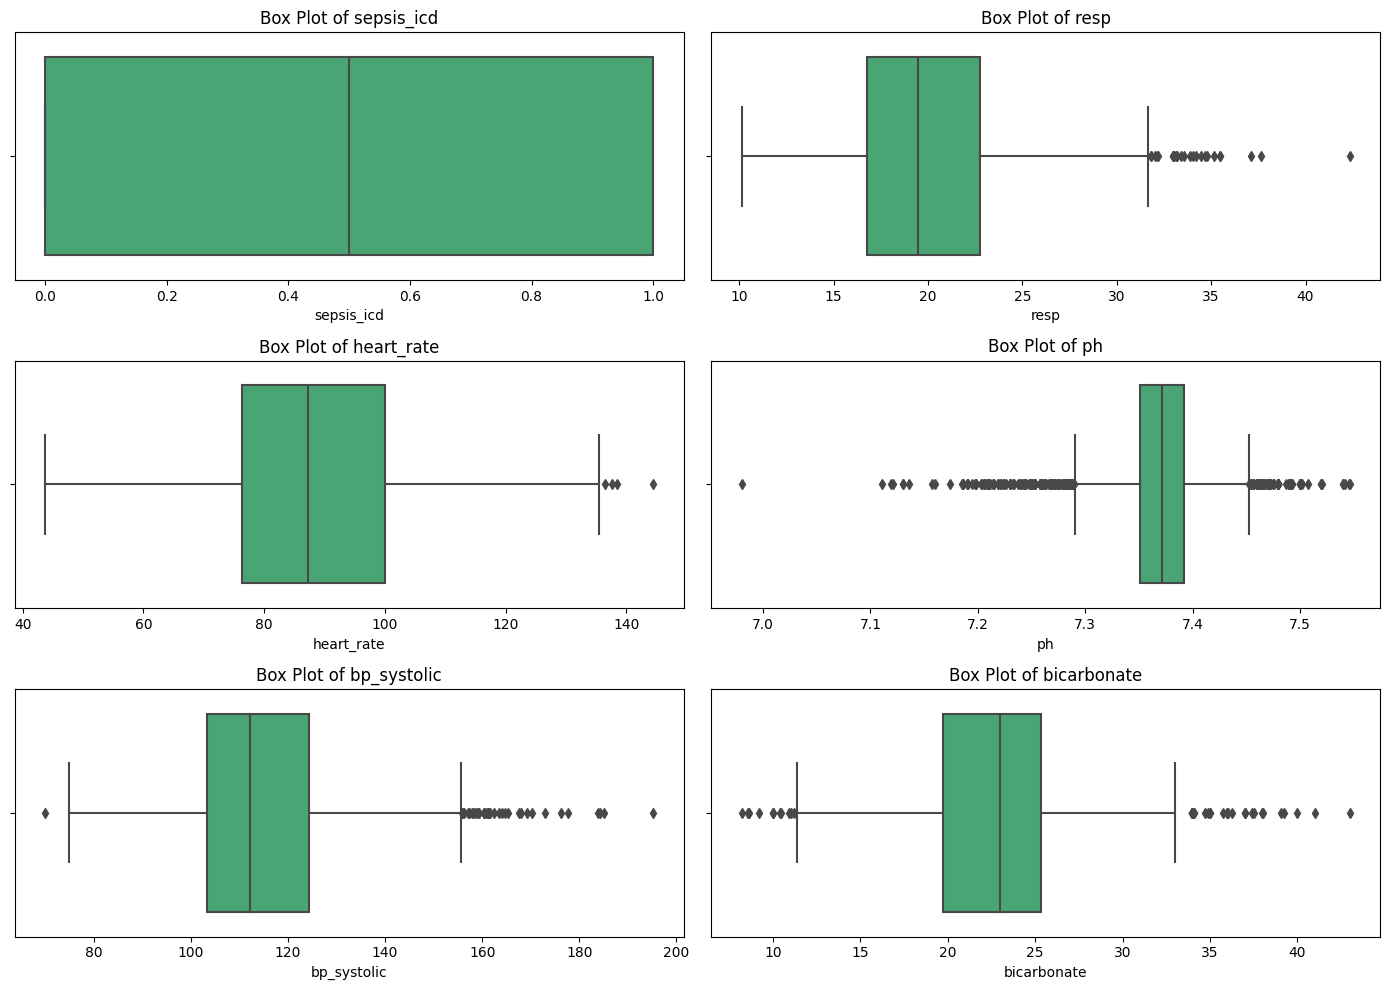

In [76]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(selected_data, 1):
    plt.subplot(3,2, i)
    sns.boxplot(x=selected_data[column], color='mediumseagreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [25]:
print("Available columns in filtered dataset:")
print(correlation_matrix_filtered.columns)

Available columns in filtered dataset:
Index(['sepsis_icd', 'sirs', 'qsofa', 'resp', 'heart_rate', 'ph',
       'bp_systolic', 'bicarbonate'],
      dtype='object')


In [26]:
input_columns_filtered = [col for col in input_columns if col in correlation_matrix_filtered.columns]
print("Filtered input columns:")
print(input_columns_filtered)

Filtered input columns:
['heart_rate', 'bp_systolic', 'resp', 'ph', 'bicarbonate']


Below, while defining x,y input and target features, i scaled all values.

In [27]:
scaler = MinMaxScaler()
X = scaler.fit_transform(selected_data[input_columns_filtered])
y = selected_data[output_column].values
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

Shape of X: (1500, 5), Shape of y: (1500,)


In [66]:
stats = selected_data.agg(['min', 'max', 'std']).transpose()
stats.columns = ['Min', 'Max', 'Standard Deviation']

print("Statistical Summary of Parameters:")
print(stats)

# Count the number of positive (sepsis=1) and negative (sepsis=0) instances
positive_instances = selected_data[selected_data['sepsis_icd'] == 1].shape[0]
negative_instances = selected_data[selected_data['sepsis_icd'] == 0].shape[0]

print("\nNumber of Positive and Negative Instances:")
print(f"Positive Instances (Sepsis=1): {positive_instances}")
print(f"Negative Instances (Sepsis=0): {negative_instances}")

Statistical Summary of Parameters:
                   Min         Max  Standard Deviation
sepsis_icd    0.000000    1.000000            0.500167
resp         10.130435   42.333333            4.495964
heart_rate   43.739130  144.454545           16.258880
ph            6.980000    7.546364            0.058115
bp_systolic  70.000000  195.208333           16.549550
bicarbonate   8.200000   43.000000            4.680794

Number of Positive and Negative Instances:
Positive Instances (Sepsis=1): 750
Negative Instances (Sepsis=0): 750


In [28]:
selected_data

,sepsis_icd,sirs,qsofa,resp,heart_rate,ph,bp_systolic,bicarbonate
0,0,0.130435,0.130435,17.521739,95.043478,7.371304,100.217391,21.809524
1,0,0.000000,0.000000,17.000000,71.695652,7.371304,121.652174,25.217391
2,1,0.714286,0.380952,27.761905,100.000000,7.371304,104.380952,17.000000
3,0,0.791667,0.625000,29.695652,79.652174,7.360000,105.782609,19.000000
4,1,0.666667,0.166667,14.875000,94.166667,7.456667,113.208333,27.000000
...,...,...,...,...,...,...,...,...
1495,0,0.000000,0.000000,15.875000,62.625000,7.371304,125.416667,29.000000
1496,0,0.875000,0.000000,21.416667,87.875000,7.371304,113.625000,32.250000
1497,0,0.500000,0.000000,23.095238,81.409091,7.371304,132.523810,34.000000
1498,1,1.000000,0.304348,27.869565,112.347826,7.479545,126.454545,27.173913


## ANFIS Components
- <b>Fuzzy Inputs and Membership Functions</b><br>
Define membership functions for the input variables.

- <b>Fuzzy Rules</b><br>
Create fuzzy if-then rules based my features' correlation ("If heart rate is high, then sepsis is likely").

- <b>Fuzzy Inference</b><br>
Use the inference system.

- <b>Defuzzification</b><br>
Compute crisp output from the fuzzy inference system.

- <b>Learning</b><br>
Use gradient descent or another optimization method to tune parameters of the membership functions.



In [29]:
selected_data = selected_data.drop(columns=['sirs', 'qsofa'])

In [78]:
selected_data.to_csv('selected_data.csv', index=False)

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

In [31]:
selected_data

,sepsis_icd,resp,heart_rate,ph,bp_systolic,bicarbonate
0,0,17.521739,95.043478,7.371304,100.217391,21.809524
1,0,17.000000,71.695652,7.371304,121.652174,25.217391
2,1,27.761905,100.000000,7.371304,104.380952,17.000000
3,0,29.695652,79.652174,7.360000,105.782609,19.000000
4,1,14.875000,94.166667,7.456667,113.208333,27.000000
...,...,...,...,...,...,...
1495,0,15.875000,62.625000,7.371304,125.416667,29.000000
1496,0,21.416667,87.875000,7.371304,113.625000,32.250000
1497,0,23.095238,81.409091,7.371304,132.523810,34.000000
1498,1,27.869565,112.347826,7.479545,126.454545,27.173913


In [32]:
# Gaussian Membership Function
def gaussian_mf(x, mean, sigma):
    return torch.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

In [33]:
# Compute Rule Activations for a Batch
def batch_rule_activation(inputs, rules, fuzzy_sets):
    batch_size = inputs.size(0)
    num_rules = len(rules)
    rule_activations = torch.ones(batch_size, num_rules, dtype=torch.float32)

    for rule_idx, rule in enumerate(rules):
        for feature, fuzzy_set_name in rule['conditions'].items():
            feature_idx = feature_index_map[feature]
            fuzzy_set_details = next(
                item for item in fuzzy_sets[feature] if item['name'] == fuzzy_set_name
            )
            mean = torch.tensor(fuzzy_set_details['mean'], dtype=torch.float32)
            sigma = torch.tensor(fuzzy_set_details['sigma'], dtype=torch.float32)
            input_values = inputs[:, feature_idx]
            mf_output = gaussian_mf(input_values, mean, sigma)
            rule_activations[:, rule_idx] *= mf_output

    return rule_activations

In [34]:
# ANFIS Model
class ANFIS(nn.Module):
    def __init__(self, num_rules):
        super(ANFIS, self).__init__()
        self.output_weights = nn.Parameter(torch.randn(num_rules))

    def forward(self, rule_activations):
        weighted_outputs = rule_activations * self.output_weights
        total_activation = torch.sum(rule_activations, dim=1)
        total_activation[total_activation == 0] = 1e-6  # division by zero
        return torch.sum(weighted_outputs, dim=1) / total_activation

In [69]:
# Training Function
def train_anfis(X, y, rules, fuzzy_sets, model, learning_rate, epochs, batch_size=32):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    dataset_size = len(X)
    for epoch in range(epochs):
        total_loss = 0
        true_positive = 0
        false_positive = 0
        true_negative = 0
        false_negative = 0
        correct_predictions = 0

        indices = torch.randperm(dataset_size)
        X = X[indices]
        y = y[indices]
        all_targets = []
        all_predictions = []

        for start_idx in range(0, dataset_size, batch_size):
            end_idx = min(start_idx + batch_size, dataset_size)
            batch_inputs = X[start_idx:end_idx]
            batch_targets = y[start_idx:end_idx]

            rule_activations = batch_rule_activation(batch_inputs, rules, fuzzy_sets)

            predictions = model(rule_activations)
            loss = criterion(predictions, batch_targets)
            total_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            all_targets.extend(batch_targets.cpu().numpy())
            all_predictions.extend(predictions.cpu().detach().numpy())

            batch_preds = torch.round(predictions)  # Threshold = 0.5
            true_positive += ((batch_preds == 1) & (batch_targets == 1)).sum().item()
            false_positive += ((batch_preds == 1) & (batch_targets == 0)).sum().item()
            true_negative += ((batch_preds == 0) & (batch_targets == 0)).sum().item()
            false_negative += ((batch_preds == 0) & (batch_targets == 1)).sum().item()


            correct_predictions += (torch.round(predictions) == batch_targets).sum().item()

        accuracy = (true_positive + true_negative) / dataset_size * 100
        TPR = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        FPR = false_positive / (false_positive + true_negative) if (false_positive + true_negative) > 0 else 0
        TNR = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        FNR = false_negative / (false_negative + true_positive) if (false_negative + true_positive) > 0 else 0
        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        F1 = 2 * (precision * TPR) / (precision + TPR) if (precision + TPR) > 0 else 0
        ROC_AUC = roc_auc_score(all_targets, all_predictions)

        print(f"Epoch {epoch + 1}")
        print(f"Loss: {total_loss:.4f}, Accuracy: {accuracy:.2f}%")
        print(f"TPR (Recall): {TPR:.2f}, FPR: {FPR:.2f}, TNR (Specificity): {TNR:.2f}, FNR: {FNR:.2f}")
        print(f"Precision: {precision:.2f}, F1-Score: {F1:.2f}, ROC AUC: {ROC_AUC:.2f}")

In [70]:
# generate fuzzy sets using percentiles
def generate_fuzzy_sets(data):
    fuzzy_sets = {}
    for feature in data.columns:
        feature_values = data[feature].values
        low_mean = np.percentile(feature_values, 25)
        normal_mean = np.percentile(feature_values, 50)
        high_mean = np.percentile(feature_values, 75)
        sigma = (np.max(feature_values) - np.min(feature_values)) / 6
        fuzzy_sets[feature] = [
            {'name': 'Low', 'mean': low_mean, 'sigma': sigma},
            {'name': 'Normal', 'mean': normal_mean, 'sigma': sigma},
            {'name': 'High', 'mean': high_mean, 'sigma': sigma},
        ]
    return fuzzy_sets


correlations to create rules: <br>
resp           0.282415<br>
heart_rate     0.248462<br>
ph            -0.220355<br>
bp_systolic   -0.265758<br>
bicarbonate   -0.288430

In [71]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

feature_index_map = {
    'heart_rate': 0,    # Feature 1 -> index 0
    'bp_systolic': 1,   # Feature 2 -> index 1
    'resp': 2,          # Feature 3 -> index 2
    'ph': 3,            # Feature 4 -> index 3
    'bicarbonate': 4    # Feature 5 -> index 4
}
fuzzy_sets = generate_fuzzy_sets(selected_data)

rules = [
    {'conditions': {'heart_rate': 'High', 'resp': 'High'}, 'output': [1]},
    {'conditions': {'heart_rate': 'Low', 'bp_systolic': 'High', 'resp': 'Low'}, 'output': [0]},
    {'conditions': {'heart_rate': 'Normal', 'bp_systolic': 'Normal', 'resp': 'Normal'}, 'output': [1]},
    {'conditions': {'heart_rate': 'Low', 'resp': 'Low'}, 'output': [0]},
    {'conditions': {'bp_systolic': 'Low', 'bicarbonate': 'Low'}, 'output': [1]},
    {'conditions': {'bp_systolic': 'High', 'bicarbonate': 'Normal'}, 'output': [0]},
    {'conditions': {'ph': 'High', 'bicarbonate': 'Normal'}, 'output': [0]},
    {'conditions': {'heart_rate': 'Normal', 'bp_systolic': 'High', 'ph': 'Low'}, 'output': [0]},
]


C:\Users\zgebl\AppData\Local\Temp\ipykernel_23088\2135140288.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
C:\Users\zgebl\AppData\Local\Temp\ipykernel_23088\2135140288.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


In [38]:
print(X.shape)

torch.Size([1500, 5])


In [72]:
num_rules = len(rules)
anfis_model = ANFIS(num_rules)

train_anfis(X, y, rules, fuzzy_sets, anfis_model, learning_rate=0.01, epochs=100, batch_size=32)

predictions = []
with torch.no_grad():
    for i in range(0, len(X), 32):
        batch_inputs = X[i:i+32]
        rule_activations = batch_rule_activation(batch_inputs, rules, fuzzy_sets)
        batch_predictions = anfis_model(rule_activations)
        predictions.extend(batch_predictions.tolist())

print(predictions)

Epoch 1
Loss: 47.4107, Accuracy: 39.53%
TPR (Recall): 1.00, FPR: 1.00, TNR (Specificity): 0.00, FNR: 0.00
Precision: 0.49, F1-Score: 0.66, ROC AUC: 0.51
Epoch 2
Loss: 22.6209, Accuracy: 50.00%
TPR (Recall): 1.00, FPR: 1.00, TNR (Specificity): 0.00, FNR: 0.00
Precision: 0.50, F1-Score: 0.67, ROC AUC: 0.53
Epoch 3
Loss: 13.9975, Accuracy: 50.00%
TPR (Recall): 1.00, FPR: 1.00, TNR (Specificity): 0.00, FNR: 0.00
Precision: 0.50, F1-Score: 0.67, ROC AUC: 0.53
Epoch 4
Loss: 11.9878, Accuracy: 50.00%
TPR (Recall): 1.00, FPR: 1.00, TNR (Specificity): 0.00, FNR: 0.00
Precision: 0.50, F1-Score: 0.67, ROC AUC: 0.55
Epoch 5
Loss: 11.6922, Accuracy: 50.00%
TPR (Recall): 1.00, FPR: 1.00, TNR (Specificity): 0.00, FNR: 0.00
Precision: 0.50, F1-Score: 0.67, ROC AUC: 0.61
Epoch 6
Loss: 11.6683, Accuracy: 59.80%
TPR (Recall): 0.87, FPR: 0.67, TNR (Specificity): 0.33, FNR: 0.13
Precision: 0.56, F1-Score: 0.68, ROC AUC: 0.67
Epoch 7
Loss: 11.6571, Accuracy: 64.00%
TPR (Recall): 0.74, FPR: 0.46, TNR (Specif

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# below i made sure the types are matching
y_test = np.array(y_test)
log_reg_preds = np.array(log_reg_preds)
rf_preds = np.array(rf_preds)

log_reg_accuracy = accuracy_score(y_test, log_reg_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

print("Logistic Regression Performance:")
print(f"Accuracy: {log_reg_accuracy}")
print(classification_report(y_test, log_reg_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, log_reg_preds))

print("\nRandom Forest Performance:")
print(f"Accuracy: {rf_accuracy}")
print(classification_report(y_test, rf_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))

Logistic Regression Performance:
Accuracy: 0.7
              precision    recall  f1-score   support

         0.0       0.72      0.66      0.69       150
         1.0       0.69      0.74      0.71       150

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300

Confusion Matrix:
[[ 99  51]
 [ 39 111]]

Random Forest Performance:
Accuracy: 0.7133333333333334
              precision    recall  f1-score   support

         0.0       0.72      0.71      0.71       150
         1.0       0.71      0.72      0.72       150

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300

Confusion Matrix:
[[106  44]
 [ 42 108]]


In conclusion the accuracies can be ranked best to worst in this order: random forest, logistic regression, anfis. I will further explain my thoughts on this in my report.